In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('csv/dataset_sms_spam _v1.csv')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit(df.Teks)

X=vect.transform(df.Teks)

In [7]:
from sklearn.decomposition import TruncatedSVD

svd=TruncatedSVD(n_components=2)

svd.fit(X)

X_red = svd.transform(X)

In [8]:
X_red.shape

(1143, 2)

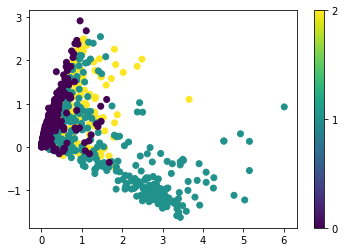

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_red[:,0], X_red[:,1], c=df.label);
plt.colorbar(ticks=[0,1,2]);

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
y_pred = kmeans.predict(X)

In [32]:
y_pred

array([6, 6, 6, ..., 8, 3, 8], dtype=int32)

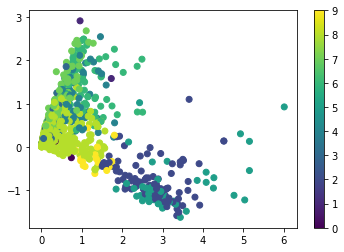

In [34]:
plt.scatter(X_red[:,0], X_red[:,1], c=y_pred);
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9]);